   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

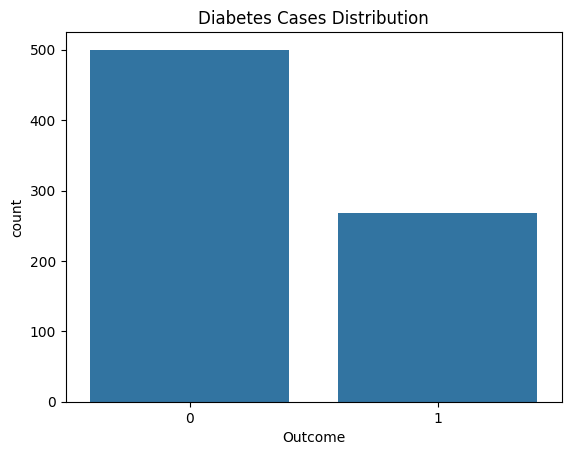

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


In [1]:
# Step 1: Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

# Step 2: Load dataset
df = pd.read_csv('../data/diabetes.csv')
print(df.head())

# Step 3: EDA
print(df.info())
print(df.describe())
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Cases Distribution")
plt.show()

# Step 4: Check for missing or zero values
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    print(f"{col} has {len(df[df[col] == 0])} zero values")

# Replace 0s with NaN and fill with median
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

# Step 5: Feature & Label Split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Step 8: Train & Evaluate Models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n🧠 Training: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.2f}")
    print(f"✅ Precision: {prec:.2f}")
    print(f"✅ Recall: {rec:.2f}")
    print("🔍 Confusion Matrix:")
    print(cm)
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))



🧠 Training: Logistic Regression
✅ Accuracy: 0.75
✅ Precision: 0.67
✅ Recall: 0.62
🔍 Confusion Matrix:
[[82 17]
 [21 34]]
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


🧠 Training: Random Forest
✅ Accuracy: 0.73
✅ Precision: 0.61
✅ Recall: 0.65
🔍 Confusion Matrix:
[[76 23]
 [19 36]]
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


🧠 Training: SVM
✅ Accuracy: 0.75
✅ Precision: 0.67
✅ Reca

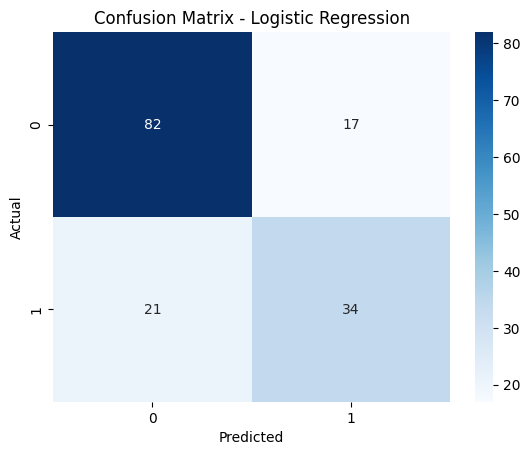

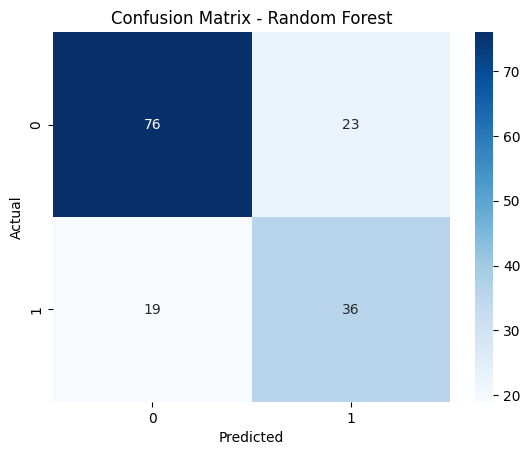

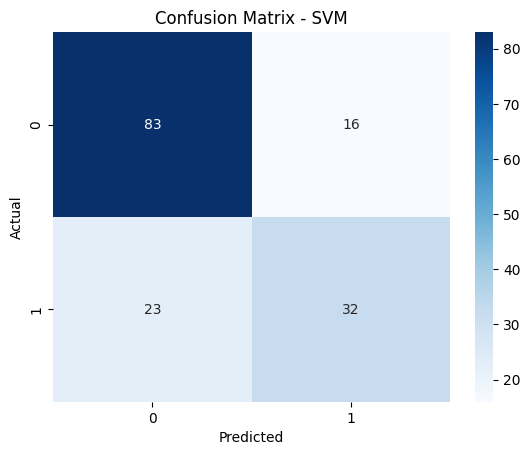

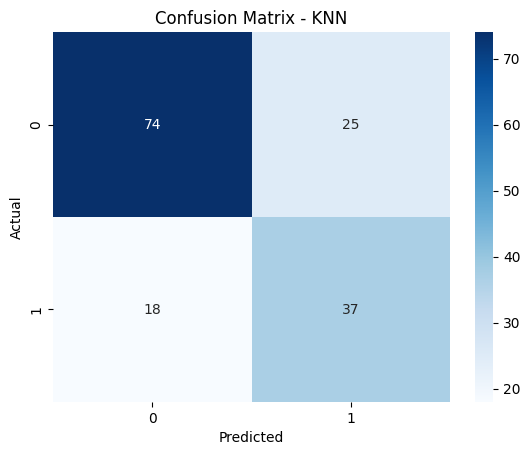

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plot_cm(cm, name)


In [4]:
import joblib

# Best model – Random Forest
best_model = models["Random Forest"]

# Save the model and scaler to disk
joblib.dump(best_model, "../models/diabetes_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")


['../models/scaler.pkl']